In [36]:
#import useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup as bf

In [47]:
# extracting the data from the api
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
response = requests.get(url)
data = response.json()
# Extracting episode data
episodes = data["_embedded"]["episodes"]

# Creating a list to store episode information
episode_info = []
# Extracting relevant information for each episode
for episode in episodes:
    episode_info.append({
        "id":episode['id'],
        "url":episode['url'],
        "name":episode['name'],
        "season":episode['season'],
        "type":episode['type'],
        "airdate":episode['airdate'],
        "airtime":episode['airtime'],
        "airstamp":episode['airstamp'],
        "runtime":episode['runtime'],
        "rating":episode['rating']['average'],
        "image_medium":episode['image']['medium'],
        "image_original":episode['image']['original'],
        "summary":bf(episode['summary'],'html.parser').get_text(),
        "_links":episode['_links']['self']['href']
    })

# Creating a dataframe from the episode information
df = pd.DataFrame(episode_info)
df.head()

,id,url,name,season,type,airdate,airtime,airstamp,runtime,rating,image_medium,image_original,summary,_links
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,A woman named Dolores is a free spirit in the ...,https://api.tvmaze.com/episodes/869671
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,regular,2016-10-09,21:00,2016-10-10T01:00:00+00:00,60,7.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,Bernard suspects that someone is sabotaging th...,https://api.tvmaze.com/episodes/911201
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,regular,2016-10-16,21:00,2016-10-17T01:00:00+00:00,60,7.6,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,Bernard continues to investigate Dolores' supp...,https://api.tvmaze.com/episodes/911204
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,regular,2016-10-23,21:00,2016-10-24T01:00:00+00:00,60,7.9,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,While Dolores joins William and Logan on their...,https://api.tvmaze.com/episodes/911205
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,regular,2016-10-30,21:00,2016-10-31T01:00:00+00:00,60,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,Dolores takes the first step on her path of di...,https://api.tvmaze.com/episodes/927174


Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

1-> Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.

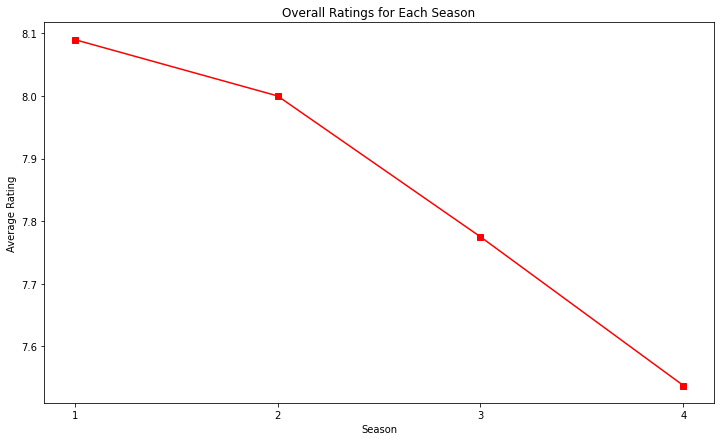

' \nBased on graph \n---------------------------------------\n- Average Rating for Season-1 = ~=8.1 -\n- Average Rating for Season-2 = ~=8.0 -\n- Average Rating for Season-1 = ~=7.8 -\n- Average Rating for Season-1 = ~=7.3 -\n---------------------------------------\n'

In [48]:
# Extracting the ratings for each season
ratings = {}
for episode in episodes:
    season = episode['season']
    rating = episode['rating']['average']
   
    if season in ratings:
        ratings[season].append(rating)
    else:
        ratings[season]=[rating]

# Creating the line plot for each season
x = list(ratings.keys())
y = [sum(rating) / len(rating) for rating in ratings.values()]

plt.figure(figsize=(12,7))
plt.plot(x, y, marker='s',color='red')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Overall Ratings for Each Season')
plt.xticks(x)
plt.show()

''' 
Based on graph 
---------------------------------------
- Average Rating for Season-1 = ~=8.1 -
- Average Rating for Season-2 = ~=8.0 -
- Average Rating for Season-1 = ~=7.8 -
- Average Rating for Season-1 = ~=7.3 -
---------------------------------------
'''



2-> Get all the episode names, whose average rating is more than 8 for every season

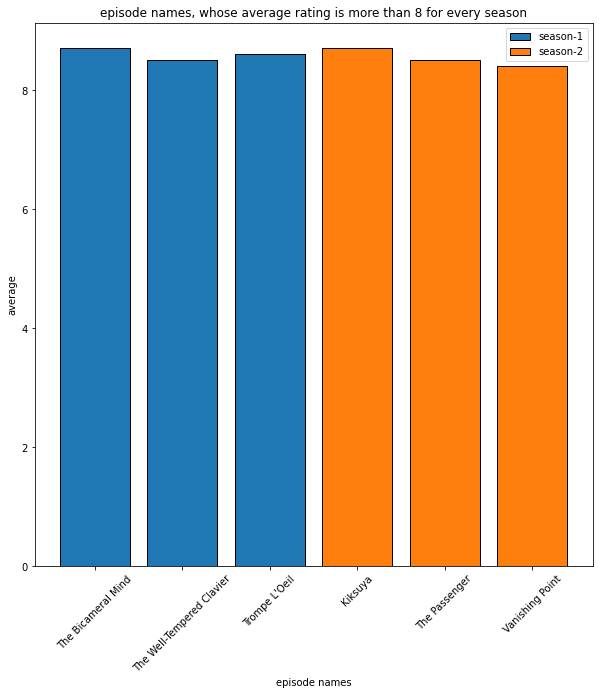

In [87]:
#filter data based on name, season, rating
filter_data = df.groupby(['name','season'])['rating'].mean().reset_index(name="average")

#extract data from filter data whose average greater than 8
extract_average = filter_data[filter_data['average']>8.0]
final_extracted_data = extract_average.sort_values('season')

#based on data there are two season where average greater than 8.0 
#plot the graph

#plotting data for season 1
x1=final_extracted_data['name'][0:3]
y1=final_extracted_data['average'][0:3]

#plotting data for season 2
x2 = final_extracted_data['name'][3:]
y2 = final_extracted_data['average'][3:]

plt.figure(figsize=(10,10))
plt.bar(x1, y1, edgecolor = "black", label = "season-1")
plt.bar(x2, y2, edgecolor = "black", label = "season-2")
plt.xlabel("episode names")
plt.ylabel("average")
plt.legend()
plt.xticks(rotation=45)
plt.title("episode names, whose average rating is more than 8 for every season")
plt.show()

3->  Get all the episode names that aired before May 2019

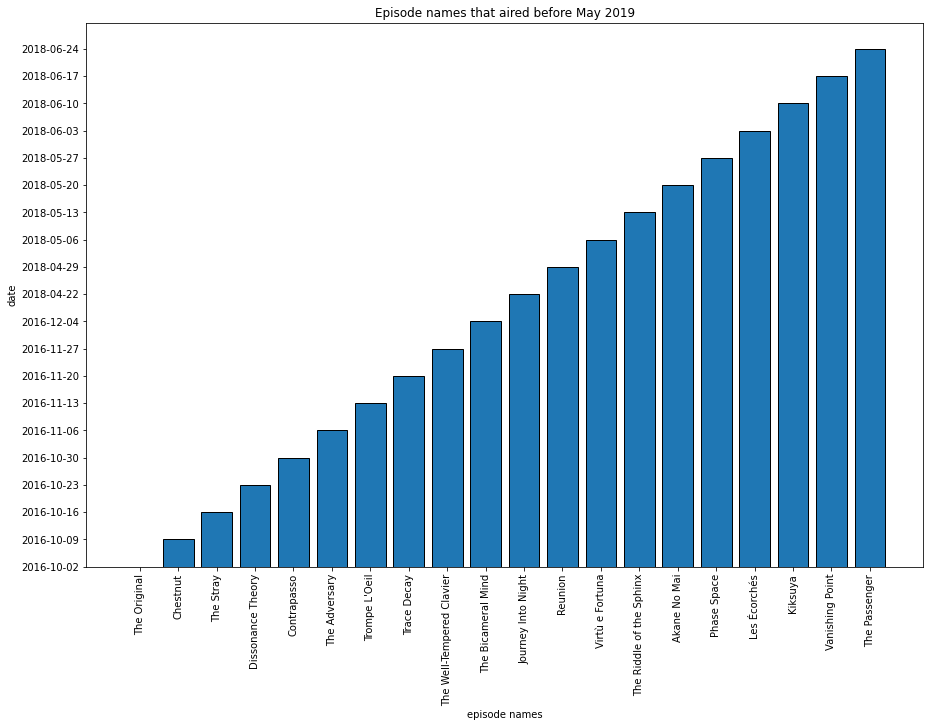

In [97]:
#filter data based on month and year
filter_data = df[df['airdate']<"2019-05-01"]
filter_data = filter_data[['name','airdate']]

#plot the graph
plt.figure(figsize=(15,10))
plt.bar(filter_data['name'],filter_data['airdate'],edgecolor='black')
plt.xlabel("episode names")
plt.ylabel("date")
plt.title("Episode names that aired before May 2019")
plt.xticks(rotation=90)
plt.show()

4-> Get the episode name from each season with the highest and lowest rating

In [98]:
df.head()

,id,url,name,season,type,airdate,airtime,airstamp,runtime,rating,image_medium,image_original,summary,_links
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,A woman named Dolores is a free spirit in the ...,https://api.tvmaze.com/episodes/869671
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,regular,2016-10-09,21:00,2016-10-10T01:00:00+00:00,60,7.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,Bernard suspects that someone is sabotaging th...,https://api.tvmaze.com/episodes/911201
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,regular,2016-10-16,21:00,2016-10-17T01:00:00+00:00,60,7.6,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,Bernard continues to investigate Dolores' supp...,https://api.tvmaze.com/episodes/911204
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,regular,2016-10-23,21:00,2016-10-24T01:00:00+00:00,60,7.9,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,While Dolores joins William and Logan on their...,https://api.tvmaze.com/episodes/911205
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,regular,2016-10-30,21:00,2016-10-31T01:00:00+00:00,60,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,Dolores takes the first step on her path of di...,https://api.tvmaze.com/episodes/927174
